# 1/ Libraries Importing & Read data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
def load_data(path):

    if path.endswith('.csv'):
        print("Data loaded successful")
        return pd.read_csv(path)
    
    elif path.endswith('.xlsx'):
        print("Data loaded successful")
        return pd.read_excel(path)
    
    else:
        raise ValueError("Only CSV and Excel files are supported.")

path = input('Please input the the path of the data ')

Please input the the path of the data International_Report_Departures.csv


In [9]:
try:
    dataFrame = load_data(path)
except Exception as e:
    print("An error occurred while loading:", str(e))
    exit(1)   

Data loaded successful


In [10]:
df = dataFrame.copy()

# 2/ Data Understanding

#### Check the content of the DataFrame

In [11]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


#### Numbers of rows and columns and dtype of their

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


# 3/Data Wrangling (Cleaning & Manipulation)

#### Are there any missing / duplicated data?

In [13]:
df.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [14]:
df.duplicated().sum()

0

#### drop type

In [15]:
df.drop('type', axis=1, inplace=True)

#### Clear null value

In [16]:
df = df.dropna()
df.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
Scheduled       0
Charter         0
Total           0
dtype: int64

# 4/Data Analysis & Visualization

In [17]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,0,20,20


#### 3 most common carrier

In [18]:
df['carrier'].value_counts().head(3)

AA    58739
DL    48520
UA    42469
Name: carrier, dtype: int64

#### 3 most common Month and least

In [19]:
df['Month'].value_counts().head(3)

3    83542
1    80975
2    79357
Name: Month, dtype: int64

In [20]:
df['Month'].value_counts().tail(3)

11    73740
10    73215
9     73028
Name: Month, dtype: int64

#### 3 most common Year and least

In [21]:
df['Year'].value_counts().head(3)

2018    39926
2017    38993
2019    38589
Name: Year, dtype: int64

In [22]:
df['Year'].value_counts().tail(3)

1990    20586
1991    20552
2020     9650
Name: Year, dtype: int64

#### 3 most common usg_apt_id

In [23]:
df['usg_apt_id'].value_counts().head(3)

13303    133729
12478     78148
12892     57485
Name: usg_apt_id, dtype: int64

#### 3 most common usg_apt

In [24]:
df['usg_apt'].value_counts().head(3)

MIA    133729
JFK     78148
LAX     57485
Name: usg_apt, dtype: int64

#### 3 most common fg_apt_id

In [25]:
df['fg_apt_id'].value_counts().head(3)

16271    50008
11032    32110
13252    26777
Name: fg_apt_id, dtype: int64

#### 3 most common fg_apt

In [26]:
df['fg_apt'].value_counts().head(3)

YYZ    50008
CUN    32110
MEX    26777
Name: fg_apt, dtype: int64

## Visualization

<AxesSubplot:>

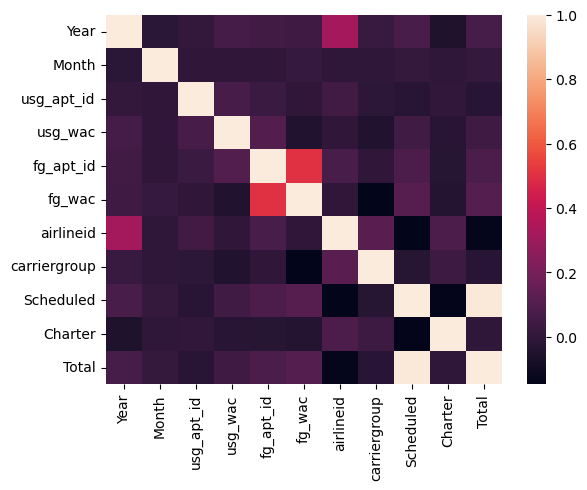

In [27]:
sns.heatmap(df.corr())

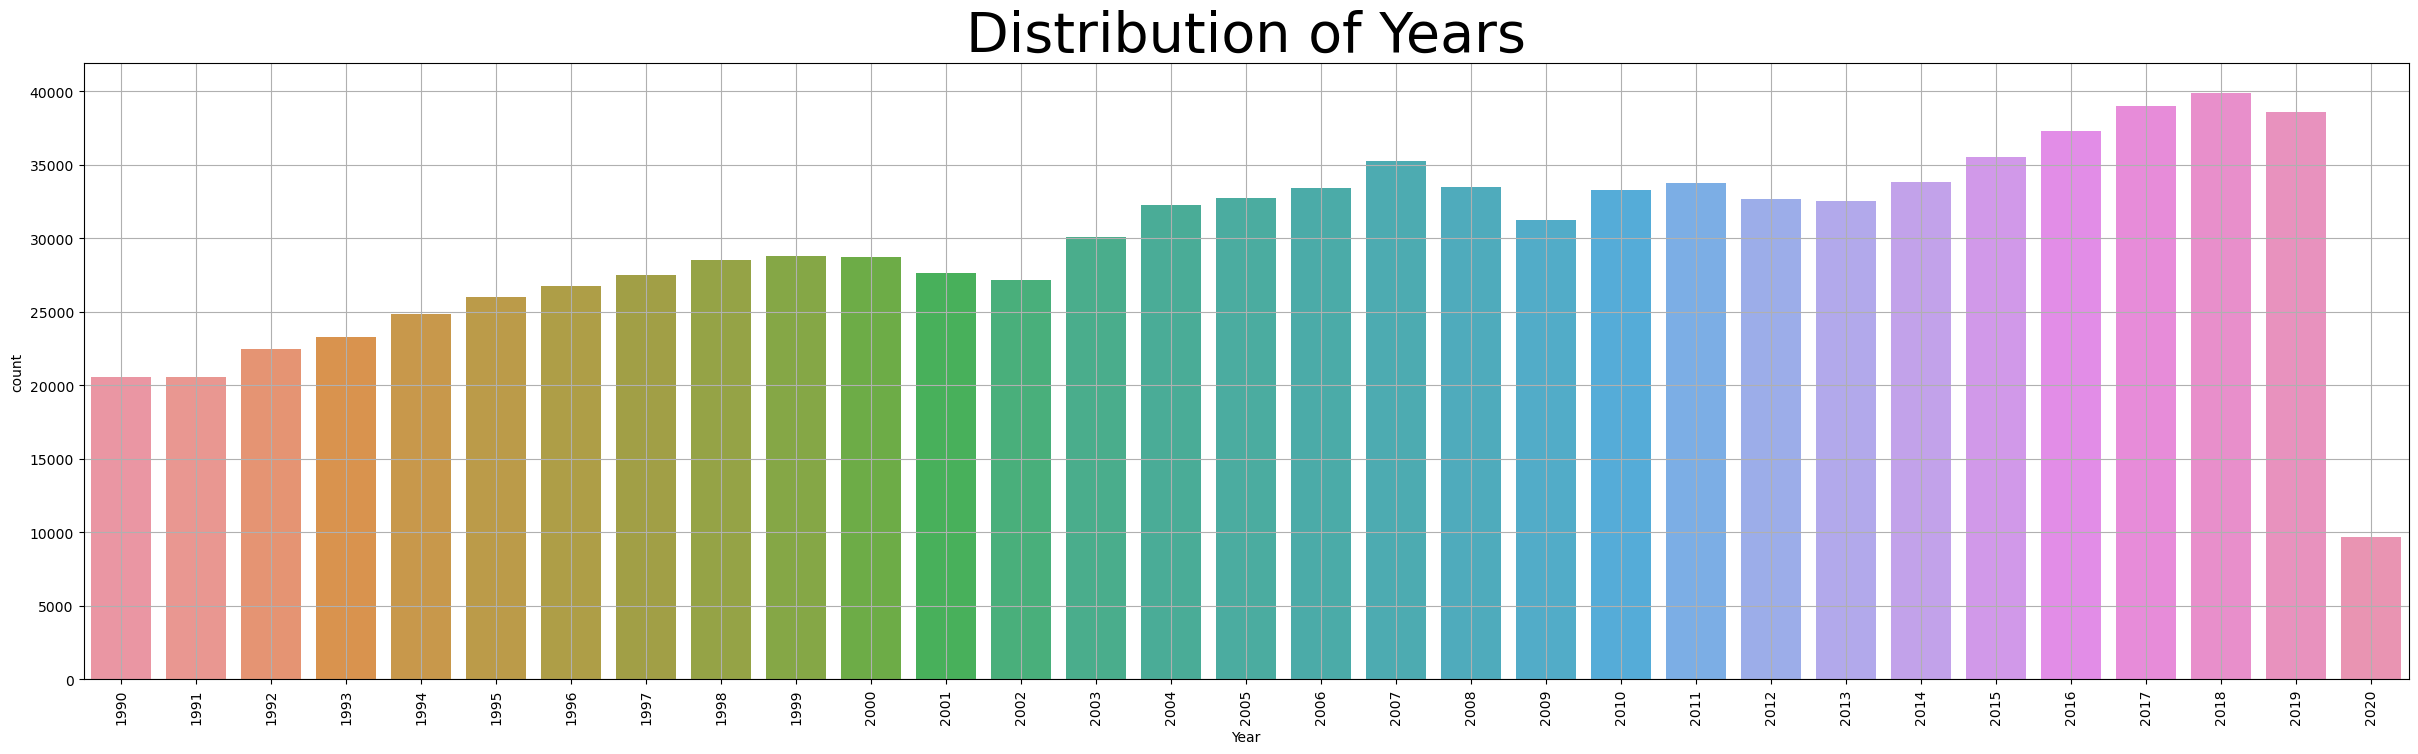

In [28]:
plt.figure(figsize=(30,8))
sns.countplot(x=df['Year'])
plt.grid()
plt.title('Distribution of Years',fontsize=40)
plt.xticks(rotation=90 )
plt.rcParams.update({'font.size': 16})
plt.show()

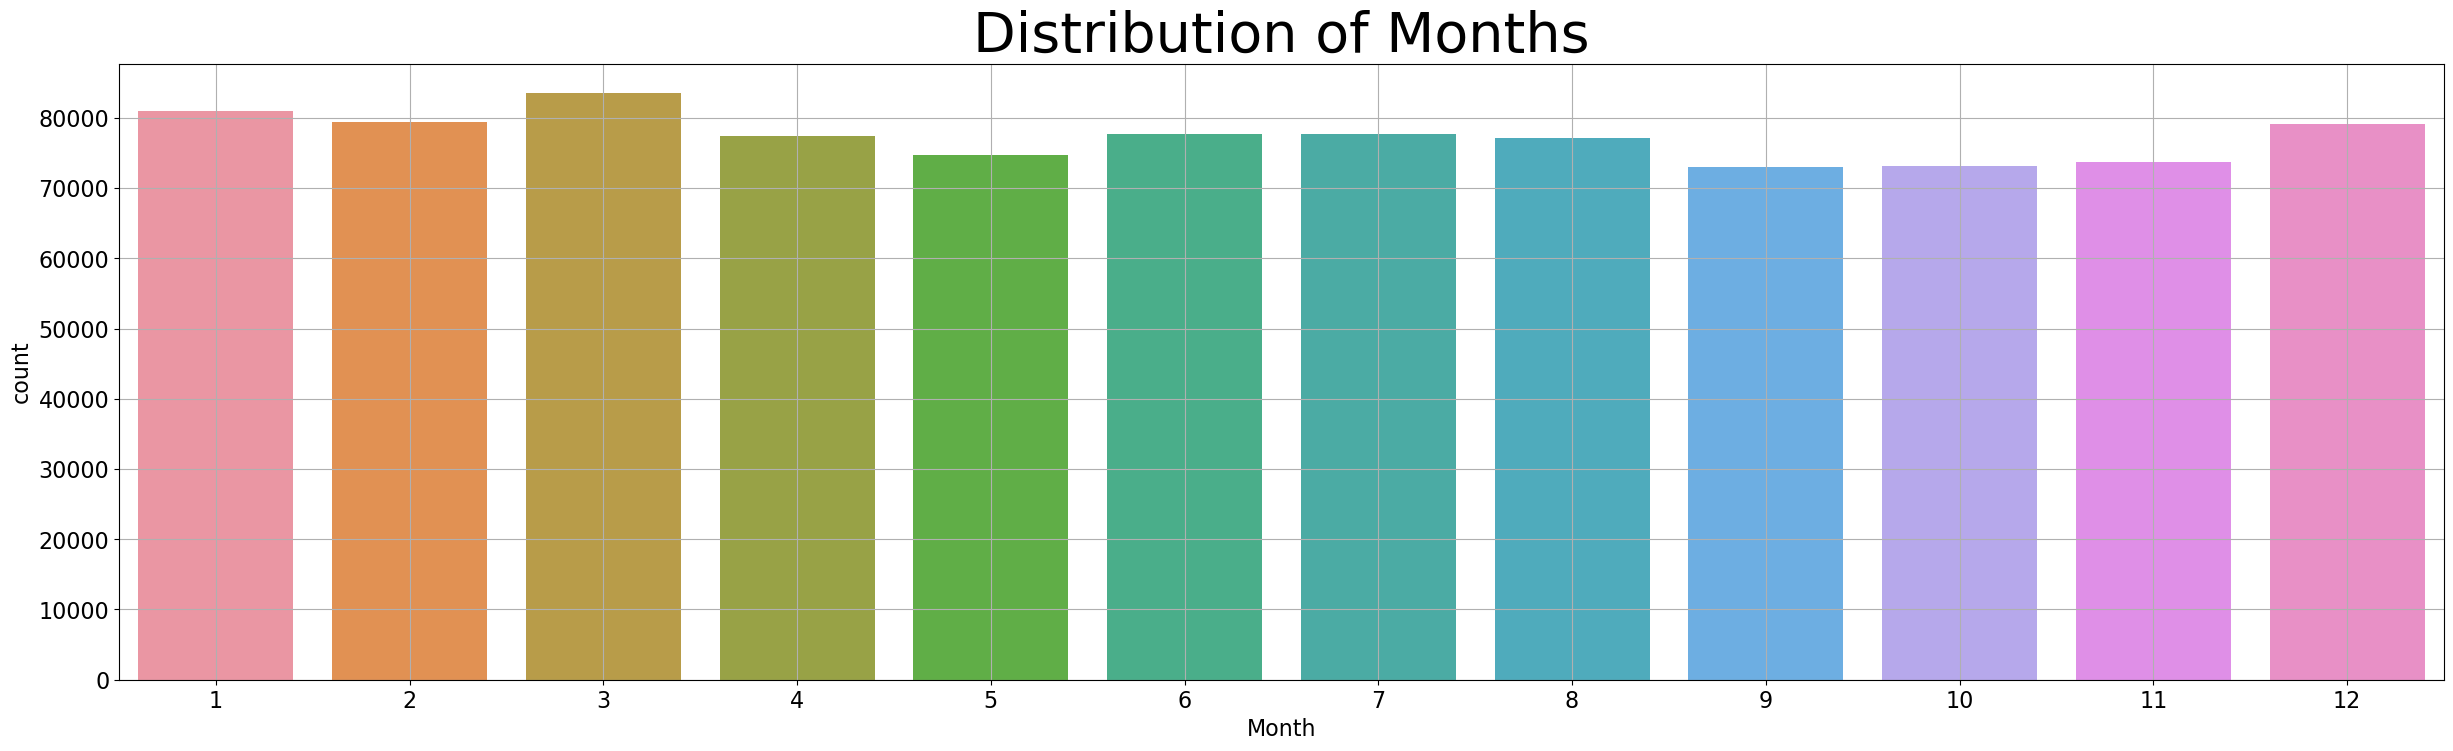

In [29]:
plt.figure(figsize=(30,8))
sns.countplot(x=df['Month'])
plt.grid()
plt.title('Distribution of Months',fontsize=40)
plt.rcParams.update({'font.size': 16})
plt.show()

In [30]:
df_Y_M = df.groupby(['Year','Month'])['Total'].sum().reset_index()

In [31]:
df_Y_M

,Year,Month,Total
0,1990,1,54129
1,1990,2,49391
2,1990,3,58542
3,1990,4,54195
4,1990,5,54863
...,...,...,...
358,2019,11,137130
359,2019,12,145140
360,2020,1,141636
361,2020,2,126629


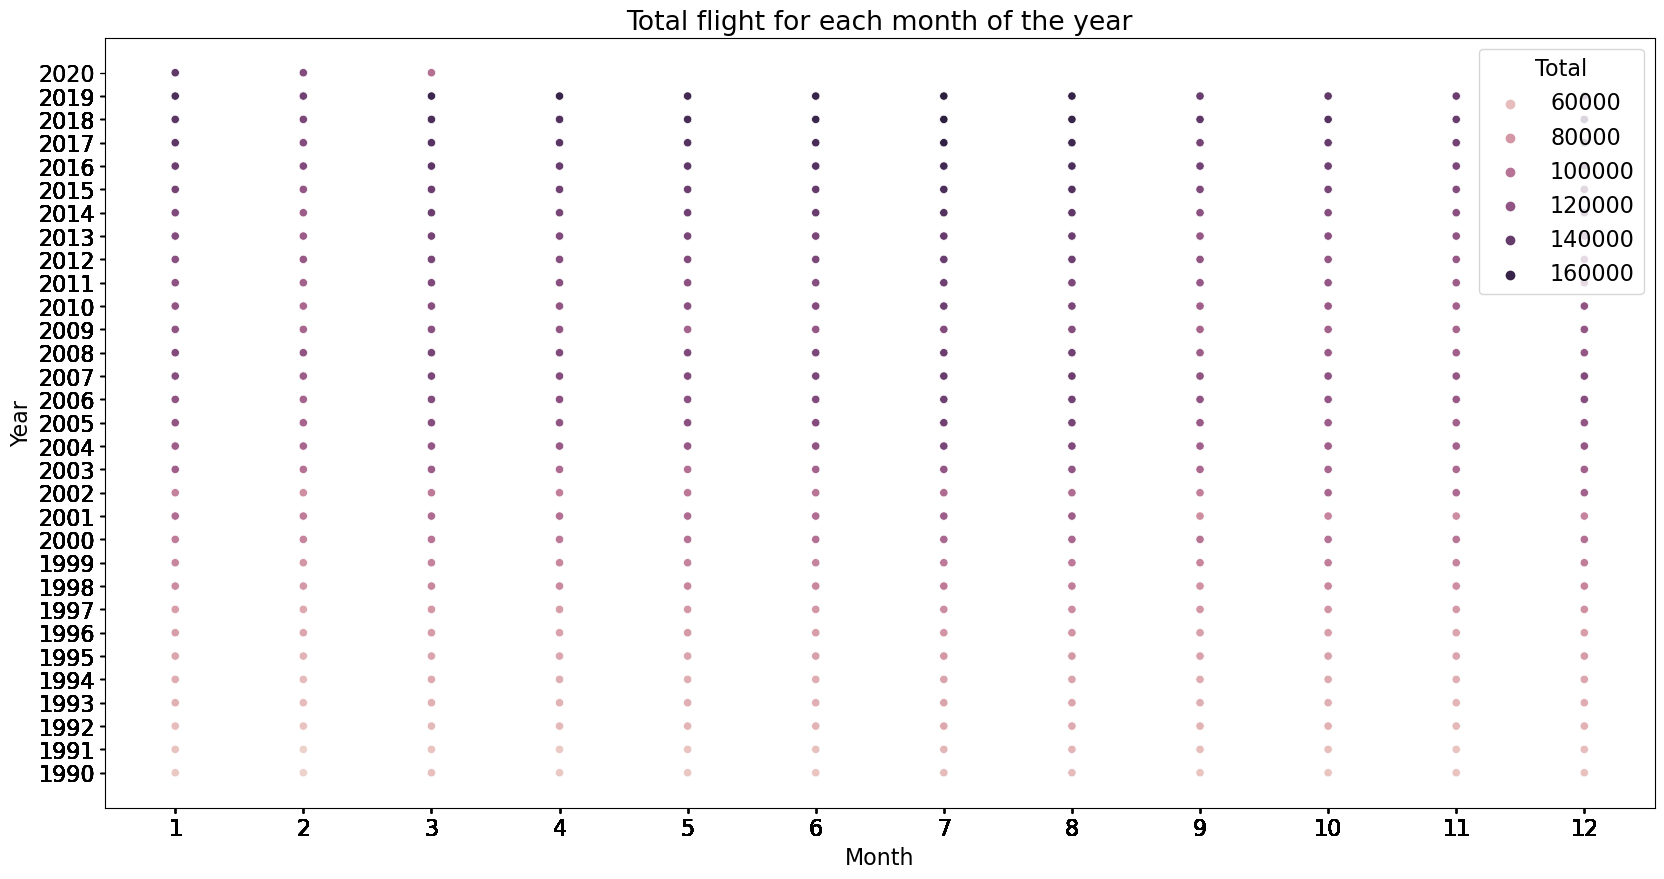

In [32]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_Y_M, x="Month", y="Year", hue="Total")
plt.xticks(df_Y_M['Month'])
plt.yticks(df_Y_M['Year'])
plt.title('Total flight for each month of the year')
plt.show()

In [33]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,0,20,20


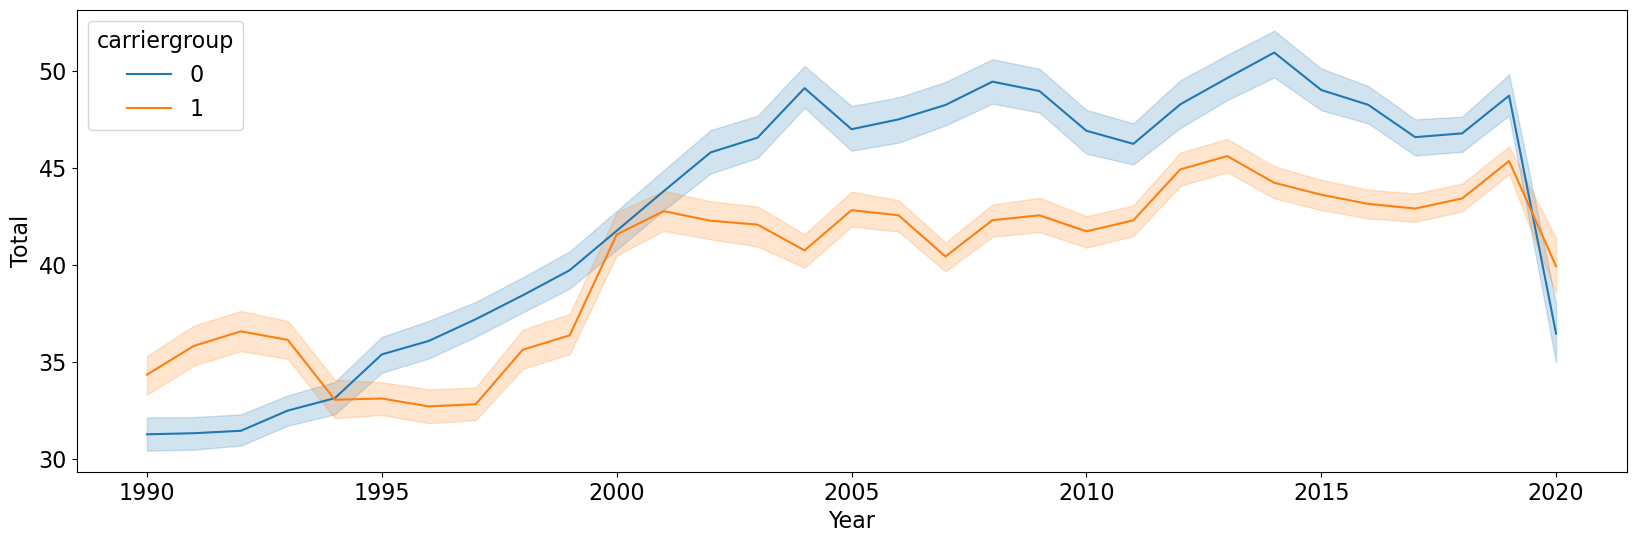

In [34]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year', y='Total', data=df, hue='carriergroup')
plt.show()

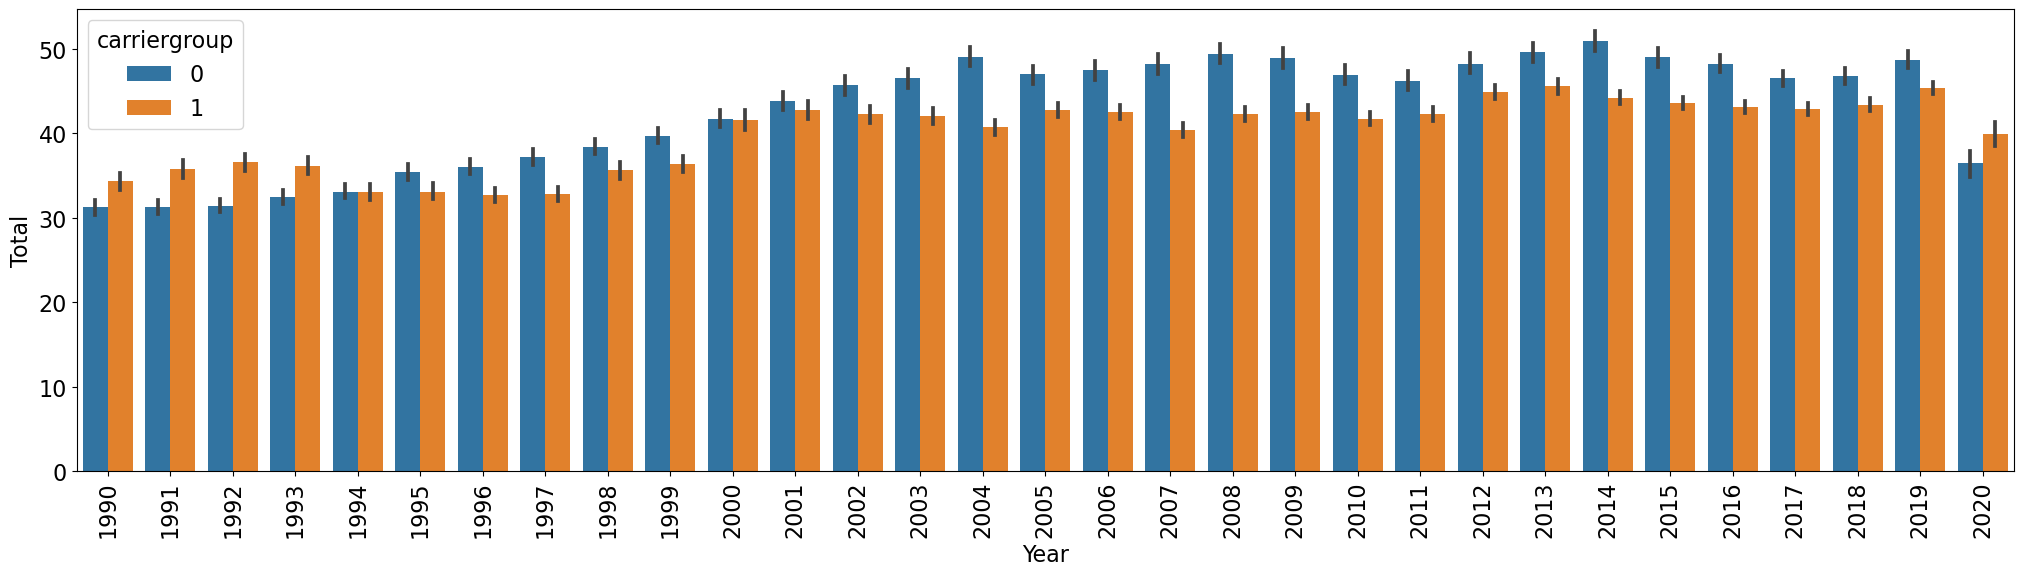

In [35]:
plt.figure(figsize=(25, 6))
sns.barplot(x='Year', y='Total', data=df, hue='carriergroup')
plt.xticks(rotation=90)
plt.show()